In [14]:
import matplotlib.pyplot as plt
import numpy as np
import cmath 
import math
from axes import phy_axes

%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200  # 200 e.g. is really fine, but slower


In [16]:
def gamma(omega: float, gamma0 : float, plus: bool) -> complex:
    """
    return the effective gamma 
    """
    val = cmath.sqrt(gamma0**2/4 -omega**2)
    if plus:
        return gamma0/2 + val
    else:
        return gamma0/2 - val


In [20]:
def damped_sho(omega:float, gamma: float, t: np.array, c1: float, c2:float) -> np.array:
    """
    return the amplitue vs time for a damped SHO
    """
    print(gamma, omega, c1, c2)
    return np.exp(-gamma*t/2)*(c1*np.exp(omega*t) + c2*np.exp(omega*t))

def omega_eff(gamma: float, omega0: float) -> complex:
    """
    return the oscillation frequency
    """
    return cmath.sqrt(gamma*gamma - omega0*omega0/4)

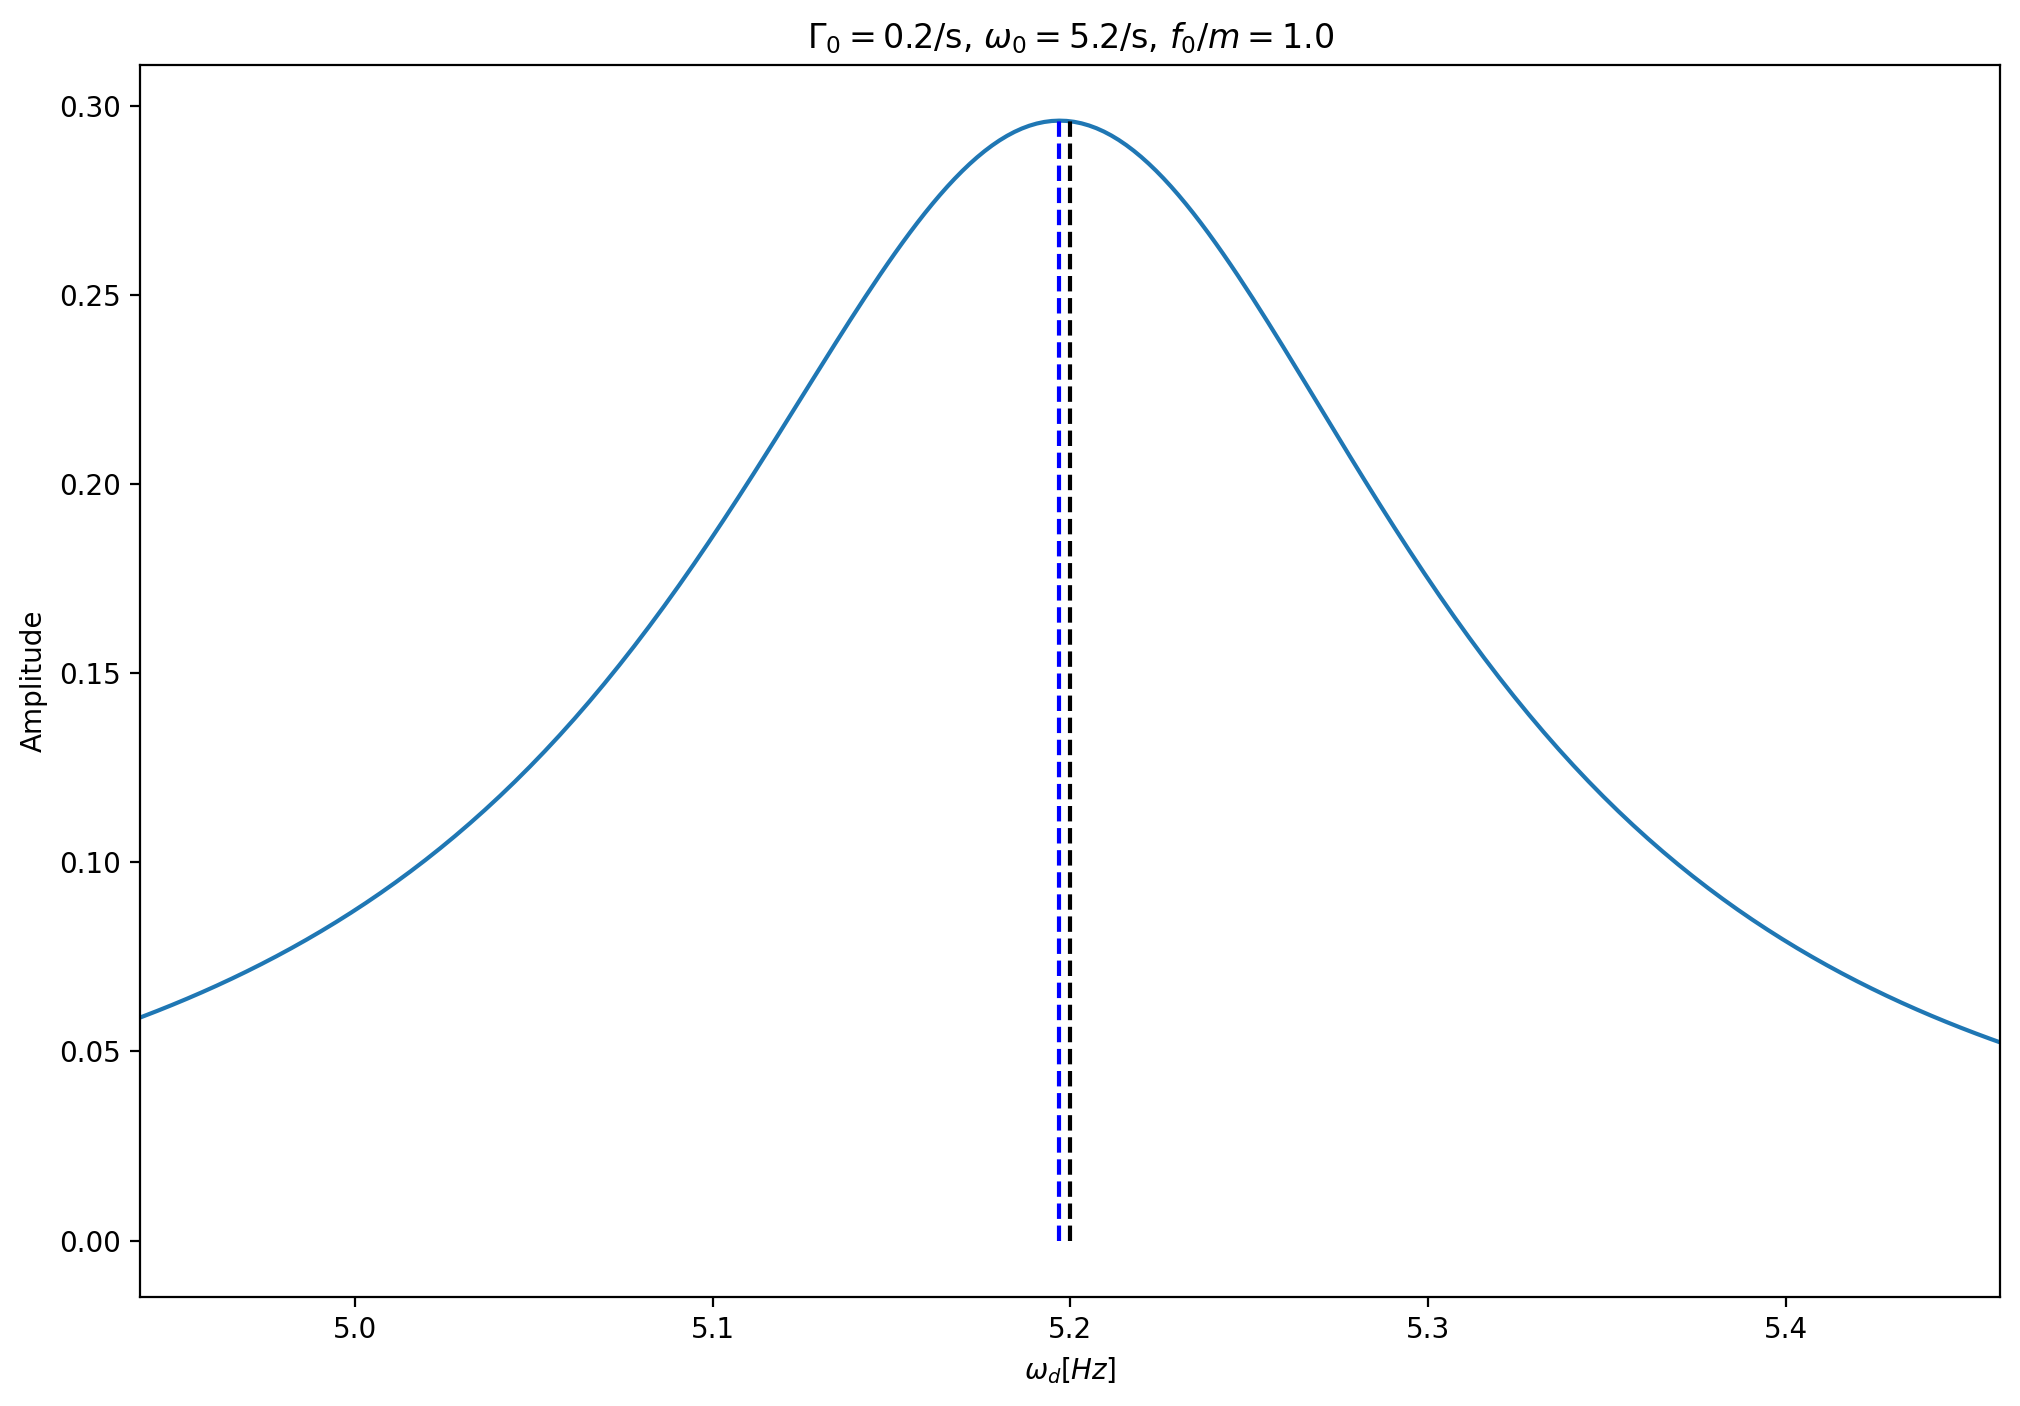

[5.07187374749499, 0.14801438628490168] [5.32187374749499, 0.14801438628490168]


In [21]:
# amplitude scan for driven, damped oscillator
gamma0=.25
omega0=5.2
f0=1
m=1
omegadvals = np.linspace(0.9*omega0, 1.1*omega0, 500)
yvals = np.array( [(f0/m)*(1./((omega0**2-omegad**2)**2+gamma0**2*omegad**2))*0.5 for omegad in omegadvals])
plt.plot(omegadvals, yvals)
plt.xlabel("$\omega_d [Hz]$")
plt.ylabel("Amplitude")
plt.title("$\Gamma_0=%3.1f$/s, $\omega_0=%3.1f$/s, $f_0/m=%3.1f$" %(gamma0,omega0, f0/m))
ymax = np.max(yvals)
plt.xlim(0.95*omega0, 1.05*omega0)
# draw a line from y= to maximum of yvals at x position of omega0
plt.plot([omega0, omega0], [0, ymax], 'k--', label="natural frequency $\omega_0$")
# draw a line from y=0 to maximum of yvals at x position of maximum of yvals
xmax = omegadvals[np.argmax(yvals)]
plt.plot([xmax, xmax ], [0, ymax], 'b--', label = "maximum amplitude")
plt.show()

## draw FWHM of curve
print([xmax-gamma0/2, ymax/2.], [xmax+gamma0/2, ymax/2.])
plt.plot([xmax-gamma0/2, xmax+gamma0/2 ],[ymax/2, ymax/2], 'r-', label="FWHM")
plt.grid()
plt.legend()

### fix up the axes
ax = plt.gca()
# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
plt.savefig("sho_damped_driven_amplitude_vs_freq.pdf")

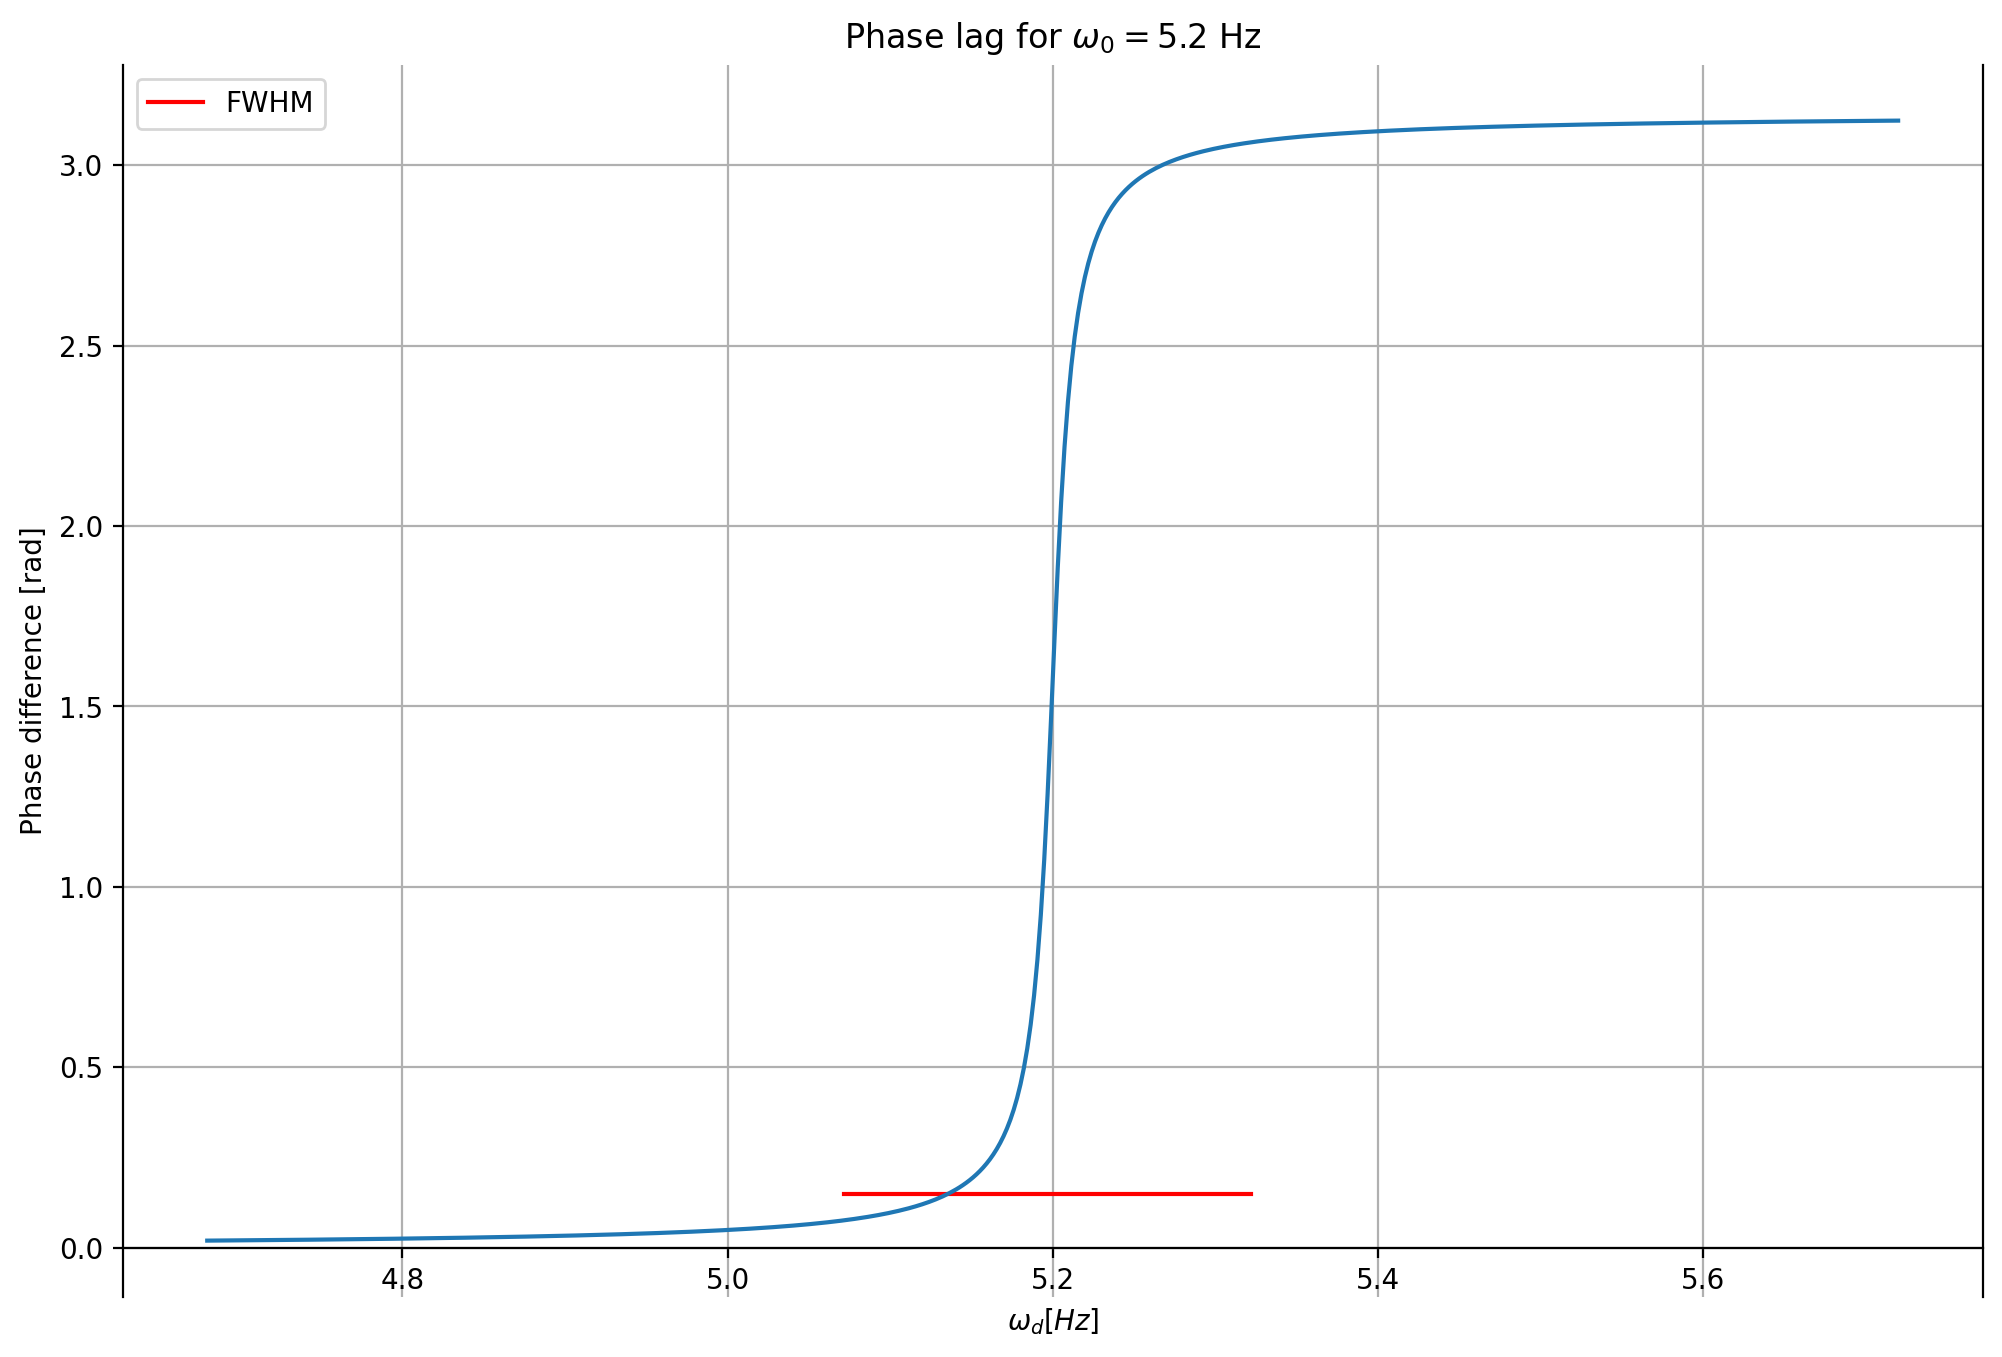

In [22]:
# phase difference
def phase(omegad: float) -> float:
    denominator = (omega0**2-omegad**2)
    return math.atan2(omega*gamma0,denominator)

phasevals = [ phase(omegad) for omegad in omegadvals]
plt.plot(omegadvals, phasevals)
plt.xlabel("$\omega_d [Hz]$")
plt.ylabel("Phase difference [rad]")
plt.title("Phase lag for $\omega_0=%3.1f$ Hz" % omega0) 

#phy_axes()
plt.grid(True)
plt.show()
plt.savefig("sho_damped_driven_phase.pdf")

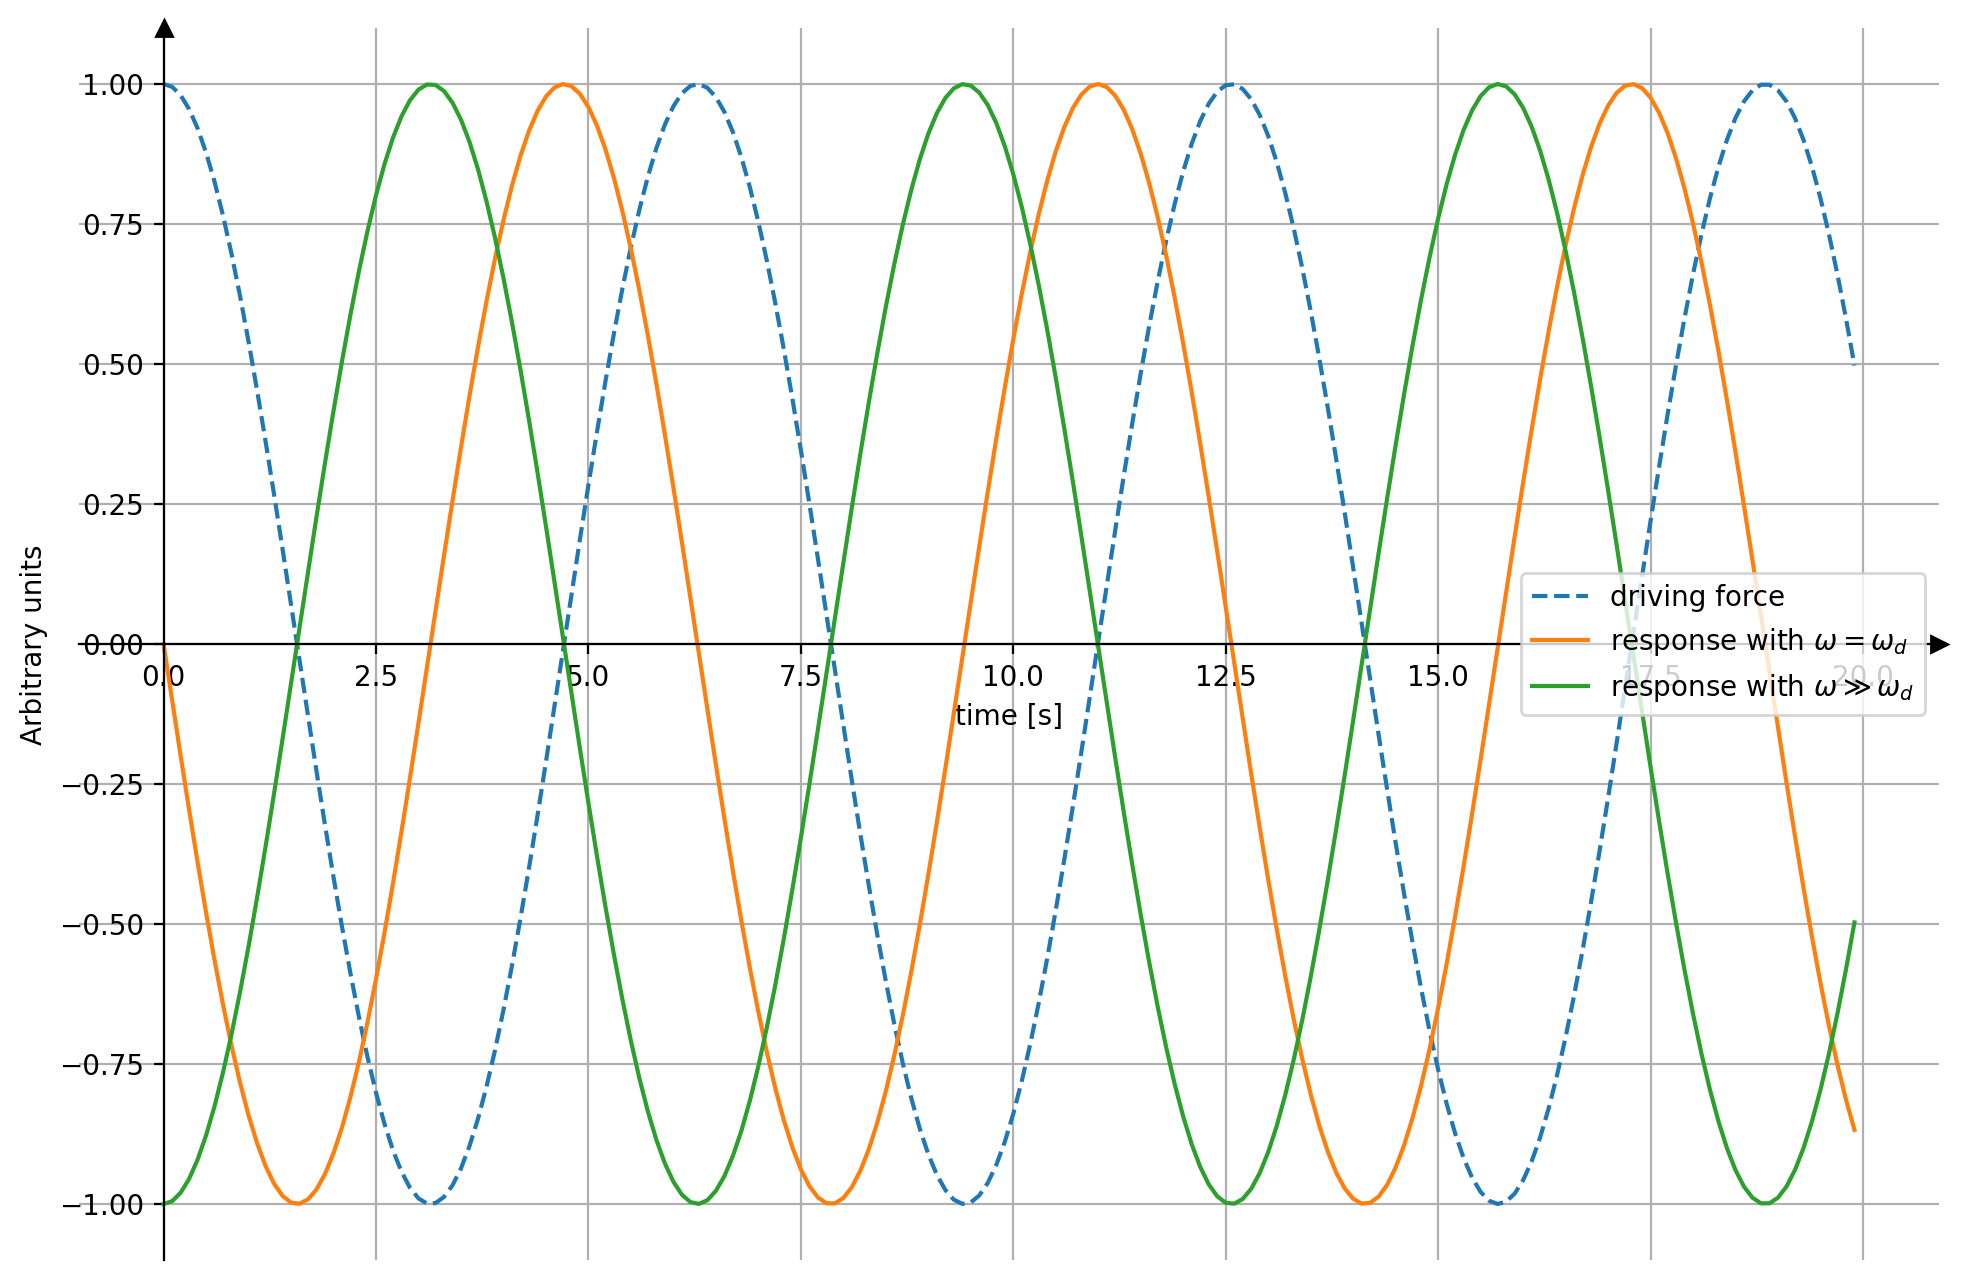

In [23]:
# simple phase lag

xpos = np.arange(0, 20,.1)
y1 = np.cos(xpos)
y2 = np.cos(xpos + np.pi/2)
y3 = np.cos(xpos + np.pi)

plt.plot(xpos, y1, label='driving force', linestyle='dashed')
plt.plot(xpos, y2, label=r'response with $\omega=\omega_d$')
plt.plot(xpos, y3, label=r'response with $\omega\gg\omega_d$')

plt.xlabel('time [s]')
plt.ylabel('Arbitrary units')

plt.legend()

phy_axes()
plt.savefig("sho_phaselag_illustrative.png")

0.25
x0d = 11.34907714523071


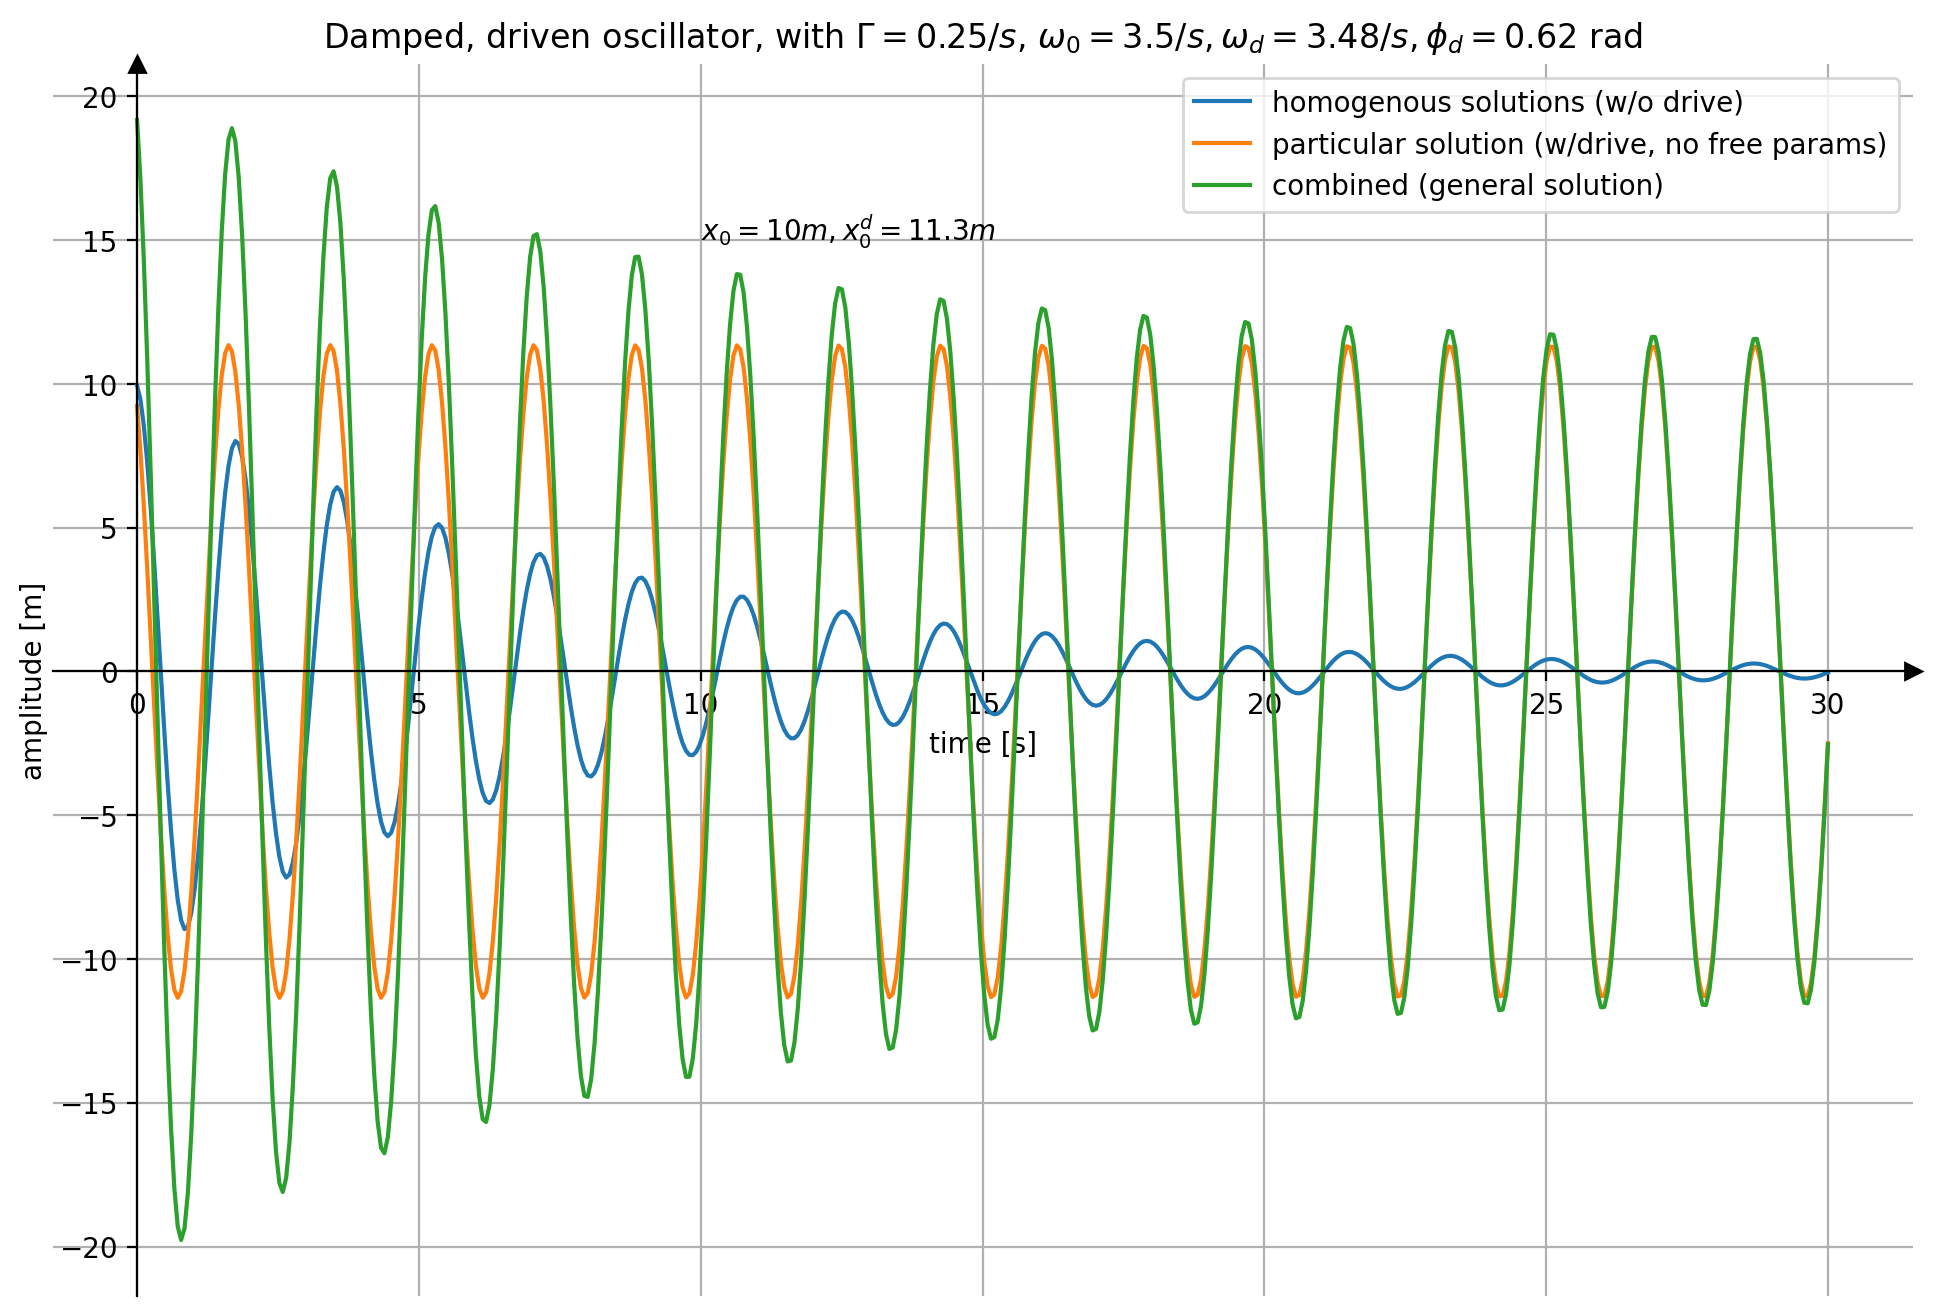

In [24]:
def phase2(omega0: float, omegad: float, gamma0: float) -> float:
    denominator = (omega0**2-omegad**2)
    return math.atan2(omega*gamma0,denominator)
print(gamma0)
t = np.linspace(0, 30, 500)
phi = 0.1
omegad = 3.48
omega0 = 3.5    
x_0 = 10
x_0d = 10/((omega0**2-omegad**2)**2+(omegad*gamma0)**2)**0.5
print(f"x0d = {x_0d}")
phi_d = phase2(omega0, omegad, gamma0)
x_n = x_0 * np.cos(omega0*t + phi)* np.exp(-gamma0*t/2)
x_p = x_0d * np.cos(omegad*t + phi_d)
plt.plot(t, x_n, label="homogenous solutions (w/o drive)") 
plt.plot(t, x_p, label="particular solution (w/drive, no free params)")
plt.plot(t, x_p+x_n, label="combined (general solution)")
plt.xlabel('time [s]')
plt.ylabel('amplitude [m]')
plt.text(10, 15, f"$x_0={x_0} m, x_0^d={x_0d:.1f} m$")
#plt.text(10, 17, f"$\phi_d={phi_d:.2f}$ rad")
plt.legend()
plt.title(f"Damped, driven oscillator, with $\Gamma={gamma0}/s$, $\omega_0 = {omega0}/s, \omega_d = {omegad}/s, \phi_d = {phi_d:.2f}$ rad")
phy_axes()
plt.savefig("sho_driven_damped_general.png")